In [2]:
pip install opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


Original image loaded. Shape: (2048, 2048)


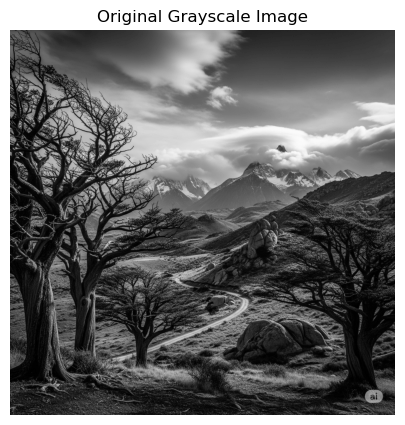

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# A helper function to display images
def display_images(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    if num_images == 1:
        axes = [axes]
    
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Load the grayscale image
try:
    img = cv2.imread('/Users/shwetkumar/Downloads/greyscale.png', cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError("Image file 'cameraman.tif' not found. Please provide a grayscale image.")
except Exception as e:
    print(f"Error loading image: {e}")
    # Create a simple dummy image if not found for demonstration
    img = np.zeros((256, 256), dtype=np.uint8)
    for i in range(256):
        for j in range(256):
            img[i, j] = i
    print("Using a generated grayscale image for demonstration.")
    
print("Original image loaded. Shape:", img.shape)
display_images([img], ['Original Grayscale Image'])

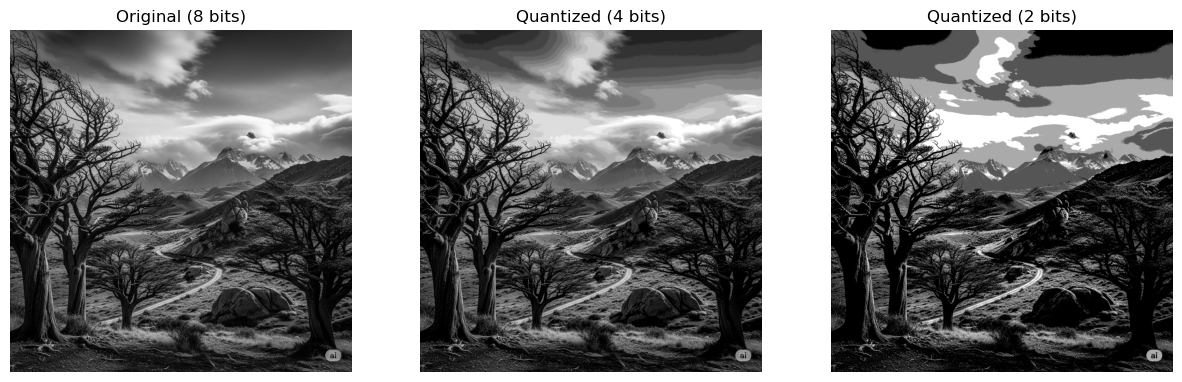

In [8]:
# Convert to 4 bits (16 levels)
# The formula is (original_value // (256/16)) * (256/16)
# Here, 256/16 = 16
quantized_4_bits = (img // 16) * 16

# Convert to 2 bits (4 levels)
# The formula is (original_value // (256/4)) * (256/4)
# Here, 256/4 = 64
quantized_2_bits = (img // 64) * 64

display_images([img, quantized_4_bits, quantized_2_bits],
               ['Original (8 bits)', 'Quantized (4 bits)', 'Quantized (2 bits)'])

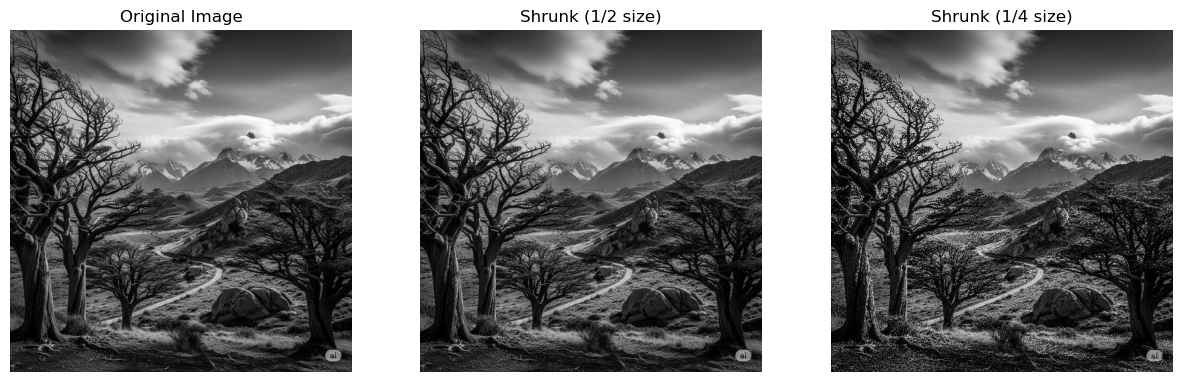

In [10]:
# Shrink to half the original size
half_size = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)

# Shrink to one-fourth the original size
quarter_size = cv2.resize(img, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_NEAREST)

display_images([img, half_size, quarter_size],
               ['Original Image', 'Shrunk (1/2 size)', 'Shrunk (1/4 size)'])

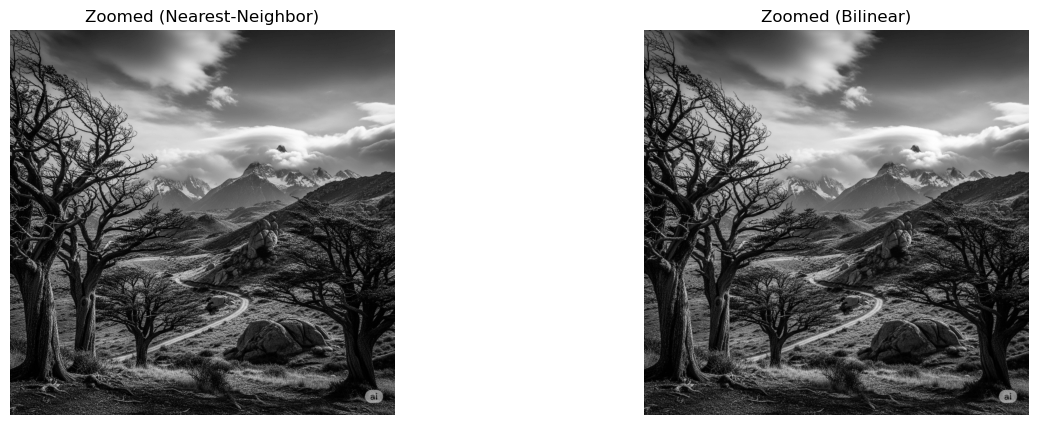

Comparison: The nearest-neighbor zoomed image looks blocky and has jagged edges, as it simply replicated pixels. The bilinear zoomed image is smoother, but slightly blurry, as it interpolated new pixel values.


In [12]:
# Assuming 'half_size' from the previous step is available
# Zoom the shrunk image back to the original size
original_h, original_w = img.shape[:2]

# Zoom using Nearest-neighbor interpolation
zoomed_nearest = cv2.resize(half_size, (original_w, original_h), interpolation=cv2.INTER_NEAREST)

# Zoom using Bilinear interpolation
zoomed_bilinear = cv2.resize(half_size, (original_w, original_h), interpolation=cv2.INTER_LINEAR)

display_images([zoomed_nearest, zoomed_bilinear],
               ['Zoomed (Nearest-Neighbor)', 'Zoomed (Bilinear)'])

print("Comparison: The nearest-neighbor zoomed image looks blocky and has jagged edges, as it simply replicated pixels. The bilinear zoomed image is smoother, but slightly blurry, as it interpolated new pixel values.")

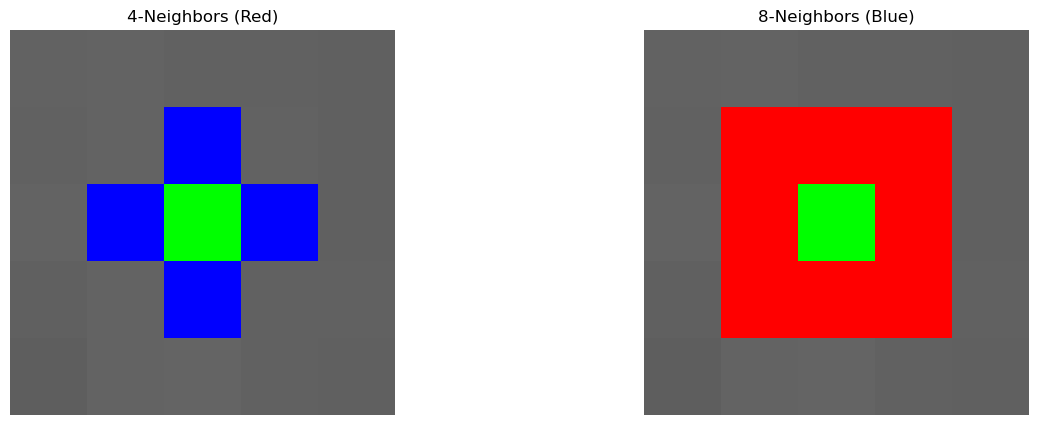

In [14]:
# Load or crop a small part of the image
small_img = img[100:105, 100:105].copy()
h, w = small_img.shape

# Define the center pixel and highlight it
center_row, center_col = h // 2, w // 2
highlighted_img = cv2.cvtColor(small_img, cv2.COLOR_GRAY2BGR) # Convert to color for marking

# 4-neighbors (in red)
# [1,0], [-1,0], [0,1], [0,-1]
for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
    highlighted_img[center_row + dx, center_col + dy] = [0, 0, 255] # Red

# 8-neighbors (in blue) - includes the 4-neighbors as well
highlighted_8_img = cv2.cvtColor(small_img, cv2.COLOR_GRAY2BGR)
for dx in [-1, 0, 1]:
    for dy in [-1, 0, 1]:
        if dx == 0 and dy == 0:
            continue
        highlighted_8_img[center_row + dx, center_col + dy] = [255, 0, 0] # Blue

# Mark the center pixel in both images (e.g., in green)
highlighted_img[center_row, center_col] = [0, 255, 0]
highlighted_8_img[center_row, center_col] = [0, 255, 0]

display_images([highlighted_img, highlighted_8_img],
               ['4-Neighbors (Red)', '8-Neighbors (Blue)'])

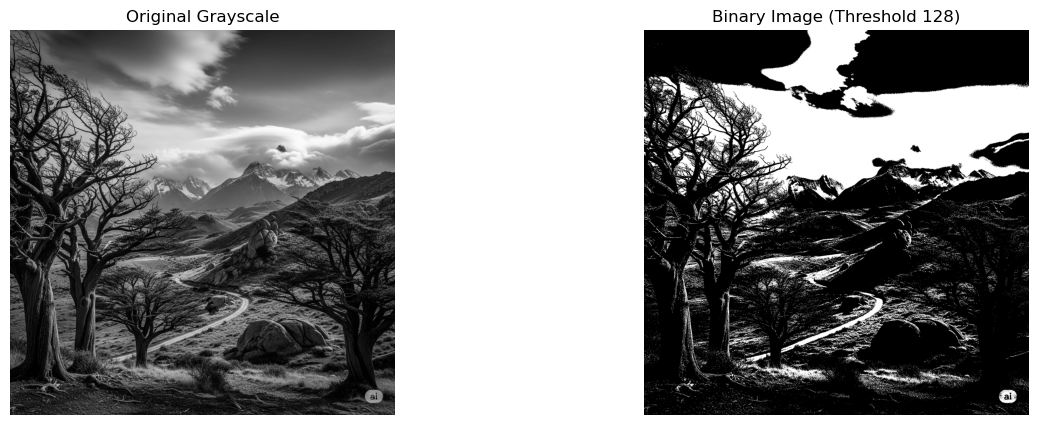

Total pixels: 4194304
Number of white pixels: 1104312
Number of black pixels: 3089992


In [16]:
# Threshold the grayscale image (e.g., using 128 as the threshold)
threshold_value = 128
ret, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Count white and black pixels
total_pixels = img.size
white_pixels = np.sum(binary_img == 255)
black_pixels = np.sum(binary_img == 0)

display_images([img, binary_img], ['Original Grayscale', 'Binary Image (Threshold 128)'])
print(f"Total pixels: {total_pixels}")
print(f"Number of white pixels: {white_pixels}")
print(f"Number of black pixels: {black_pixels}")

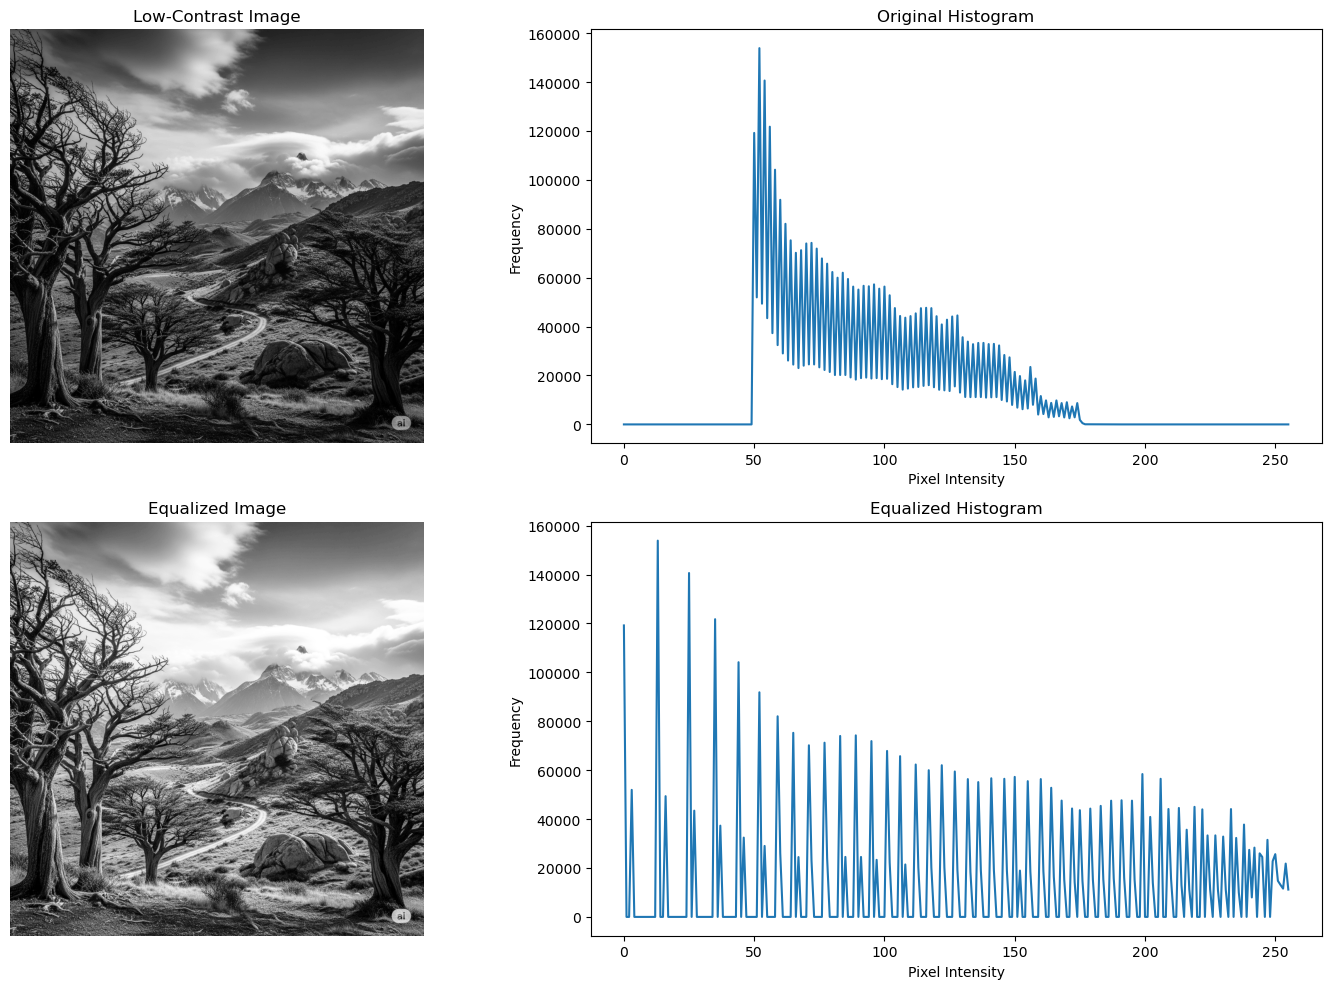

Analysis: The original histogram is narrow, showing that most pixel values are in a small range. The equalized histogram is much more spread out and flat, which corresponds to the enhanced contrast and improved visibility of details in the equalized image.


In [18]:
# Load a low-contrast image (or simulate one)
low_contrast_img = img.copy()
low_contrast_img = cv2.convertScaleAbs(low_contrast_img, alpha=0.5, beta=50)

# Original histogram
hist_orig = cv2.calcHist([low_contrast_img], [0], None, [256], [0, 256])

# Apply histogram equalization
equalized_img = cv2.equalizeHist(low_contrast_img)

# Equalized histogram
hist_eq = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Display images and histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original image and its histogram
axes[0, 0].imshow(low_contrast_img, cmap='gray')
axes[0, 0].set_title('Low-Contrast Image')
axes[0, 0].axis('off')
axes[0, 1].plot(hist_orig)
axes[0, 1].set_title('Original Histogram')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Equalized image and its histogram
axes[1, 0].imshow(equalized_img, cmap='gray')
axes[1, 0].set_title('Equalized Image')
axes[1, 0].axis('off')
axes[1, 1].plot(hist_eq)
axes[1, 1].set_title('Equalized Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Analysis: The original histogram is narrow, showing that most pixel values are in a small range. The equalized histogram is much more spread out and flat, which corresponds to the enhanced contrast and improved visibility of details in the equalized image.")

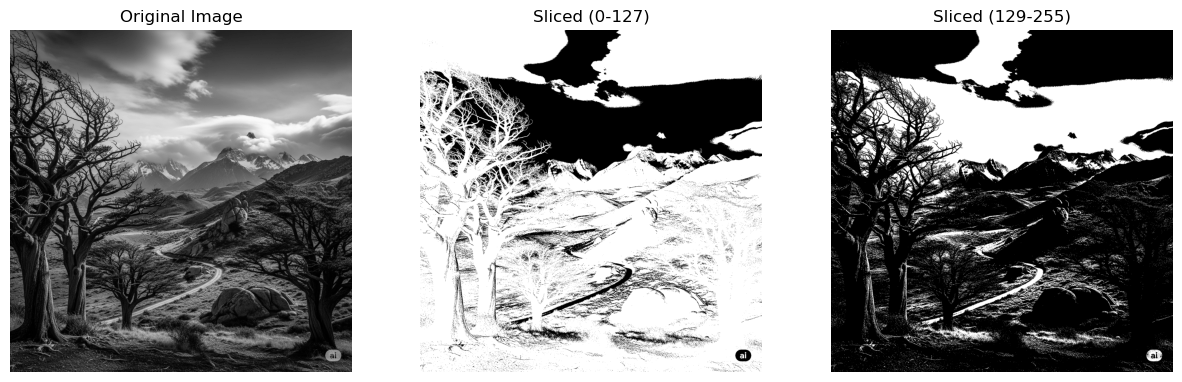

Explanation:
The first sliced image (0-127) highlights the darker regions of the original image, which often correspond to shadows or areas with less light.
The second sliced image (129-255) highlights the brighter regions of the original image, which often correspond to highlights, bright objects, or well-lit areas.
By looking at these two images, you can effectively separate the dark and light features of the scene.


In [20]:
# Define the intensity ranges
range1_low, range1_high = 0, 127
range2_low, range2_high = 129, 255

# Create the first binary image (highlighting 0-127)
sliced_img1 = np.zeros_like(img)
sliced_img1[(img >= range1_low) & (img <= range1_high)] = 255

# Create the second binary image (highlighting 129-255)
sliced_img2 = np.zeros_like(img)
sliced_img2[(img >= range2_low) & (img <= range2_high)] = 255

display_images([img, sliced_img1, sliced_img2],
               ['Original Image', 'Sliced (0-127)', 'Sliced (129-255)'])

print("Explanation:")
print(f"The first sliced image (0-127) highlights the darker regions of the original image, which often correspond to shadows or areas with less light.")
print(f"The second sliced image (129-255) highlights the brighter regions of the original image, which often correspond to highlights, bright objects, or well-lit areas.")
print("By looking at these two images, you can effectively separate the dark and light features of the scene.")